# k-Nearest Neighbors (k-NN)

## Introduction

k-Nearest Neighbors (k-NN) is a non-parametric, lazy learning algorithm that classifies data points based on their proximity to other data points. Unlike other supervised learning algorithms, k-NN doesn't learn a discriminative function from the training data but memorizes the training dataset instead.

### Mathematical Principles

The k-NN algorithm operates on a simple principle: an object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

The distance between points is typically computed using distance metrics such as:

- **Euclidean Distance**: $d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$
- **Manhattan Distance**: $d(x, y) = \sum_{i=1}^n |x_i - y_i|$
- **Minkowski Distance**: $d(x, y) = (\sum_{i=1}^n |x_i - y_i|^p)^{1/p}$

The algorithm works as follows:
1. Calculate the distance between the query instance and all training instances.
2. Sort the distances in ascending order.
3. Select the k nearest neighbors based on the sorted distances.
4. For classification: assign the majority class of these k nearest neighbors.
5. For regression: assign the average value of these k nearest neighbors.

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import joblib
import time
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the digits dataset
digits = load_digits()

# Create a pandas DataFrame for easier manipulation
data = pd.DataFrame(digits.data)
data['target'] = digits.target

# Display basic dataset information
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {digits.data.shape[1]}")
print(f"Number of classes: {len(np.unique(digits.target))}")
print(f"Sample per class: {np.bincount(digits.target)}")

# Display the first few rows of the dataset
data.head()

Dataset shape: (1797, 65)
Number of features: 64
Number of classes: 10
Sample per class: [178 182 177 183 181 182 181 179 174 180]


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 2. Exploratory Data Analysis (EDA)

In [3]:
# Basic statistical summary
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values.any())

Missing values per column:
False


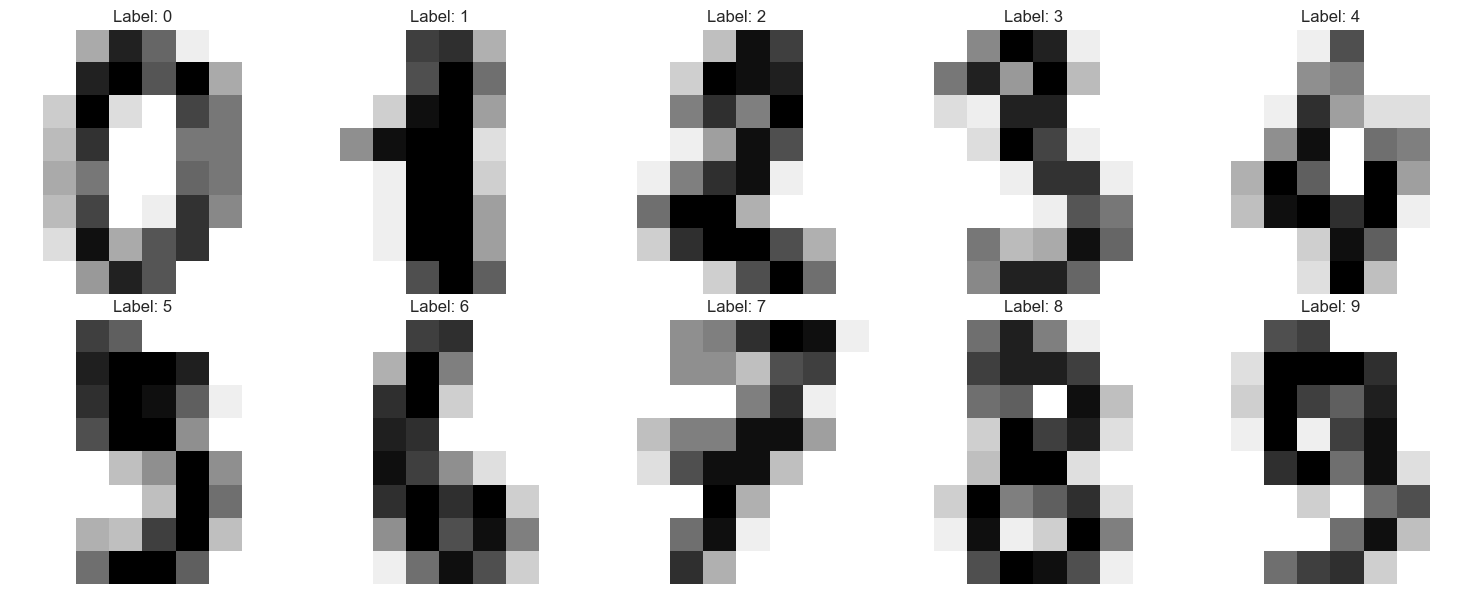

In [5]:
# Visualize some sample digits
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

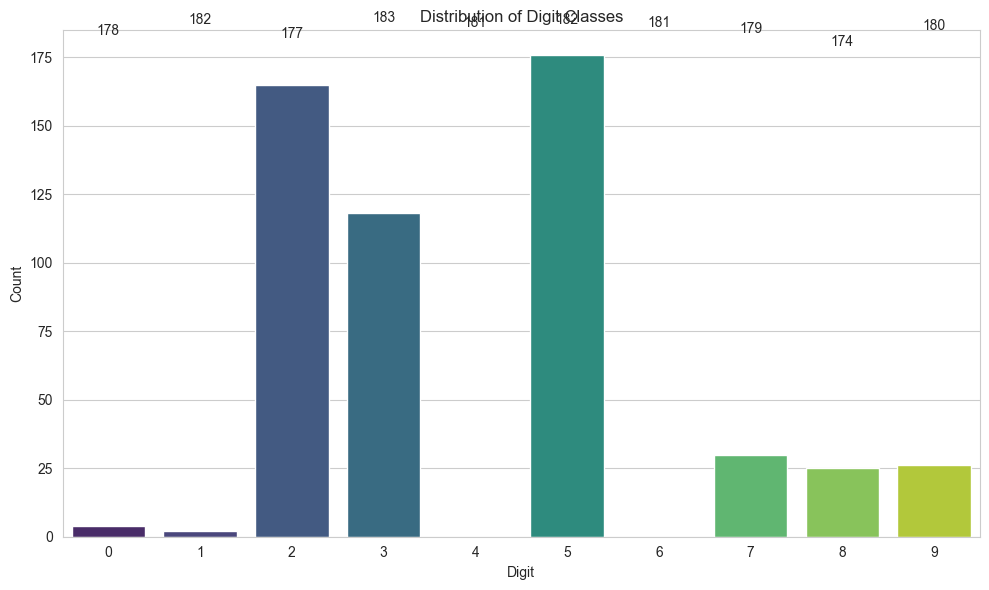

In [6]:
# Distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribution of Digit Classes')
plt.xlabel('Digit')
plt.ylabel('Count')
for i, count in enumerate(np.bincount(digits.target)):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()
plt.show()

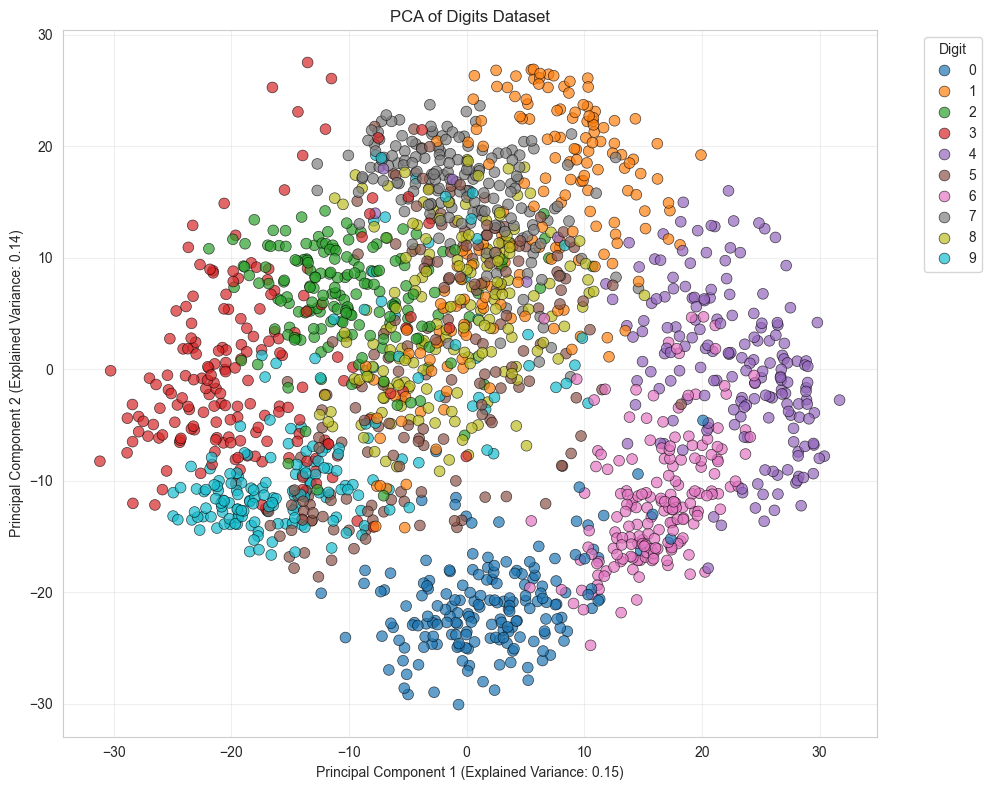

In [7]:
# Apply PCA for visualizing the data in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = digits.target

# Plot the data in the PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='tab10', 
                s=60, alpha=0.7, edgecolor='k', linewidth=0.5)
plt.title('PCA of Digits Dataset')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Data Preprocessing

In [8]:
# Extract features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

Training set shape: (1347, 64)
Testing set shape: (450, 64)
Training set class distribution: [133 136 133 137 136 136 136 134 131 135]
Testing set class distribution: [45 46 44 46 45 46 45 45 43 45]


In [9]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Display statistics of scaled data
scaled_train_df = pd.DataFrame(X_train_scaled)
print("Statistics of scaled training data:")
print(scaled_train_df.describe().round(2).loc[['mean', 'std']].T.head())

Statistics of scaled training data:
   mean  std
0   0.0  0.0
1   0.0  1.0
2   0.0  1.0
3  -0.0  1.0
4   0.0  1.0


## 4. Building a Basic k-NN Model

In [10]:
# Create a basic k-NN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Time the model fitting
start_time = time.time()
knn.fit(X_train_scaled, y_train)
fit_time = time.time() - start_time
print(f"Model fitting time: {fit_time:.4f} seconds")

# Make predictions
start_time = time.time()
y_pred = knn.predict(X_test_scaled)
predict_time = time.time() - start_time
print(f"Prediction time: {predict_time:.4f} seconds")

Model fitting time: 0.0020 seconds
Prediction time: 0.0945 seconds


  File "c:\Users\aashu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aashu\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aashu\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\aashu\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9644
Precision: 0.9651
Recall: 0.9644
F1 Score: 0.9643


In [12]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.96      1.00      0.98        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



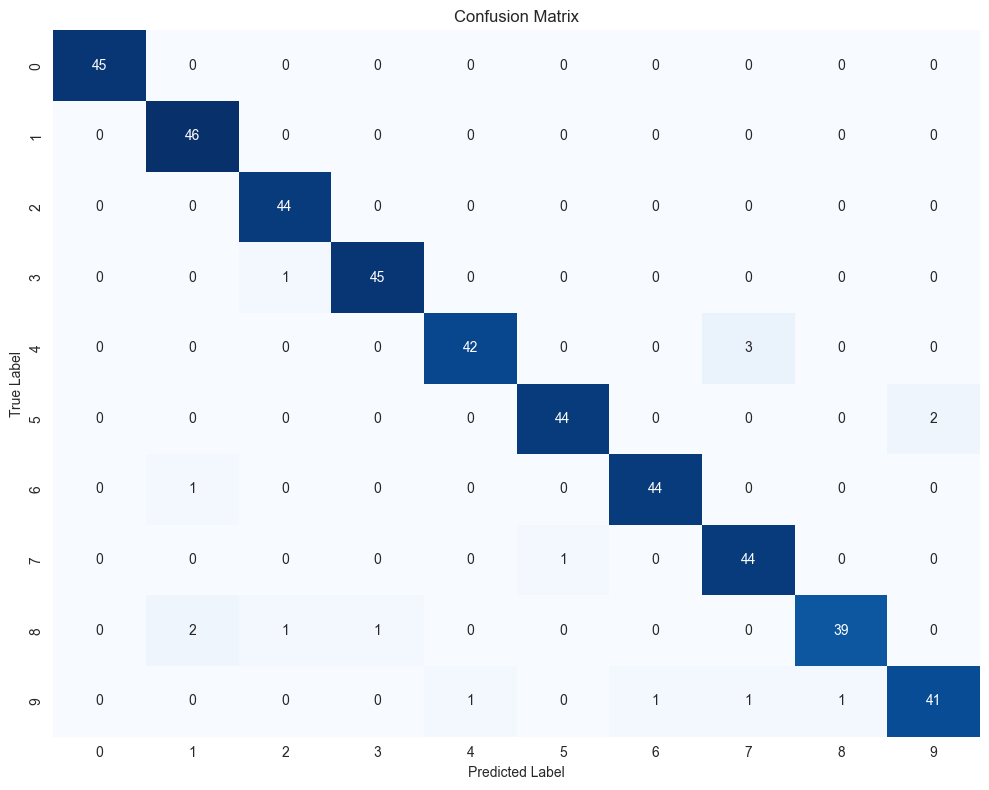

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 5. Finding the Optimal k Value

In [14]:
# Test different values of k
k_values = list(range(1, 31, 2))
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Evaluate on training data
    train_score = knn.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    
    # Evaluate on test data
    test_score = knn.score(X_test_scaled, y_test)
    test_scores.append(test_score)
    
    print(f"k={k}, Train Accuracy={train_score:.4f}, Test Accuracy={test_score:.4f}")

k=1, Train Accuracy=1.0000, Test Accuracy=0.9711
k=3, Train Accuracy=0.9881, Test Accuracy=0.9667
k=5, Train Accuracy=0.9844, Test Accuracy=0.9644
k=7, Train Accuracy=0.9859, Test Accuracy=0.9644
k=9, Train Accuracy=0.9800, Test Accuracy=0.9644
k=11, Train Accuracy=0.9785, Test Accuracy=0.9578
k=13, Train Accuracy=0.9740, Test Accuracy=0.9600
k=15, Train Accuracy=0.9718, Test Accuracy=0.9489
k=17, Train Accuracy=0.9666, Test Accuracy=0.9467
k=19, Train Accuracy=0.9666, Test Accuracy=0.9400
k=21, Train Accuracy=0.9651, Test Accuracy=0.9400
k=23, Train Accuracy=0.9644, Test Accuracy=0.9333
k=25, Train Accuracy=0.9599, Test Accuracy=0.9333
k=27, Train Accuracy=0.9592, Test Accuracy=0.9289
k=29, Train Accuracy=0.9555, Test Accuracy=0.9156


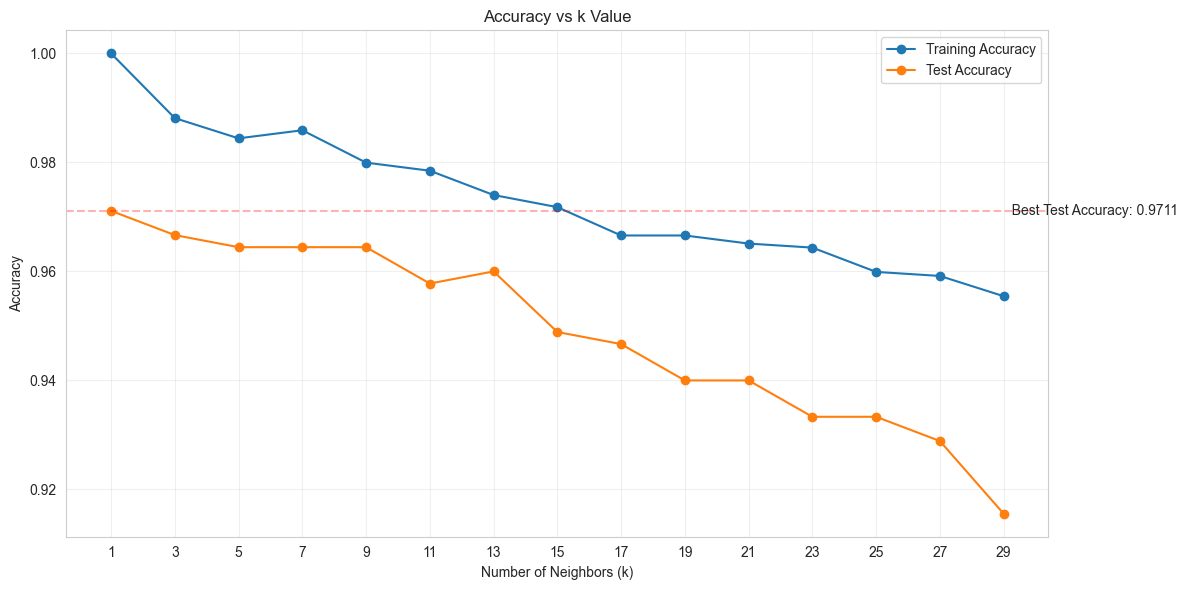

The best k value is 1 with a test accuracy of 0.9711


In [15]:
# Plot the accuracy vs k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', label='Training Accuracy')
plt.plot(k_values, test_scores, 'o-', label='Test Accuracy')
plt.axhline(y=max(test_scores), color='r', linestyle='--', alpha=0.3)
plt.text(k_values[-1], max(test_scores), f'  Best Test Accuracy: {max(test_scores):.4f}', verticalalignment='center')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k Value')
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find the best k value
best_k = k_values[test_scores.index(max(test_scores))]
print(f"The best k value is {best_k} with a test accuracy of {max(test_scores):.4f}")

## 6. Cross-Validation

In [16]:
# Perform 5-fold stratified cross-validation with the best k value
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_knn = KNeighborsClassifier(n_neighbors=best_k)

cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")
    
print(f"\nMean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.9556
Fold 2: 0.9815
Fold 3: 0.9703
Fold 4: 0.9665
Fold 5: 0.9665

Mean CV Accuracy: 0.9681
Standard Deviation: 0.0083


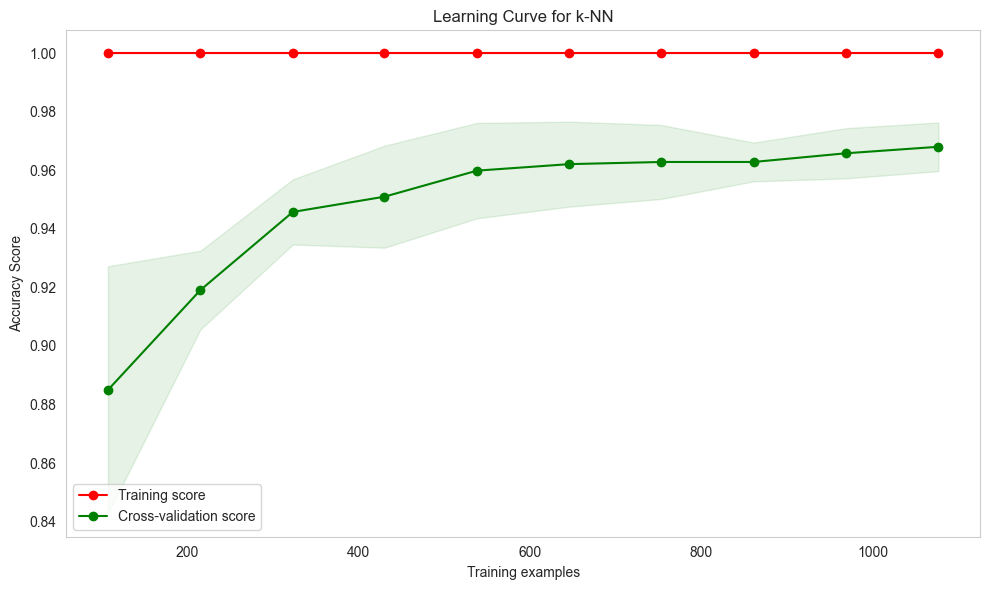

In [17]:
# Generate learning curves to diagnose overfitting/underfitting
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=best_k), X_train_scaled, y_train, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, n_jobs=-1
)

# Calculate mean and standard deviation for each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for k-NN")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

In [18]:
# Define hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 21, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# For better performance in demonstration, use a smaller grid
small_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(), small_param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

# Fit the grid search
print("Performing grid search... (this may take a while)")
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy Score: {grid_search.best_score_:.4f}")

Performing grid search... (this may take a while)
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy Score: 0.9792


In [19]:
# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')

print("\nBest Model Evaluation:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1 Score: {best_f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Best Model Evaluation:
Accuracy: 0.9644
Precision: 0.9650
Recall: 0.9644
F1 Score: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.98      0.97        46
           2       0.94      1.00      0.97        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      1.00      0.99        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



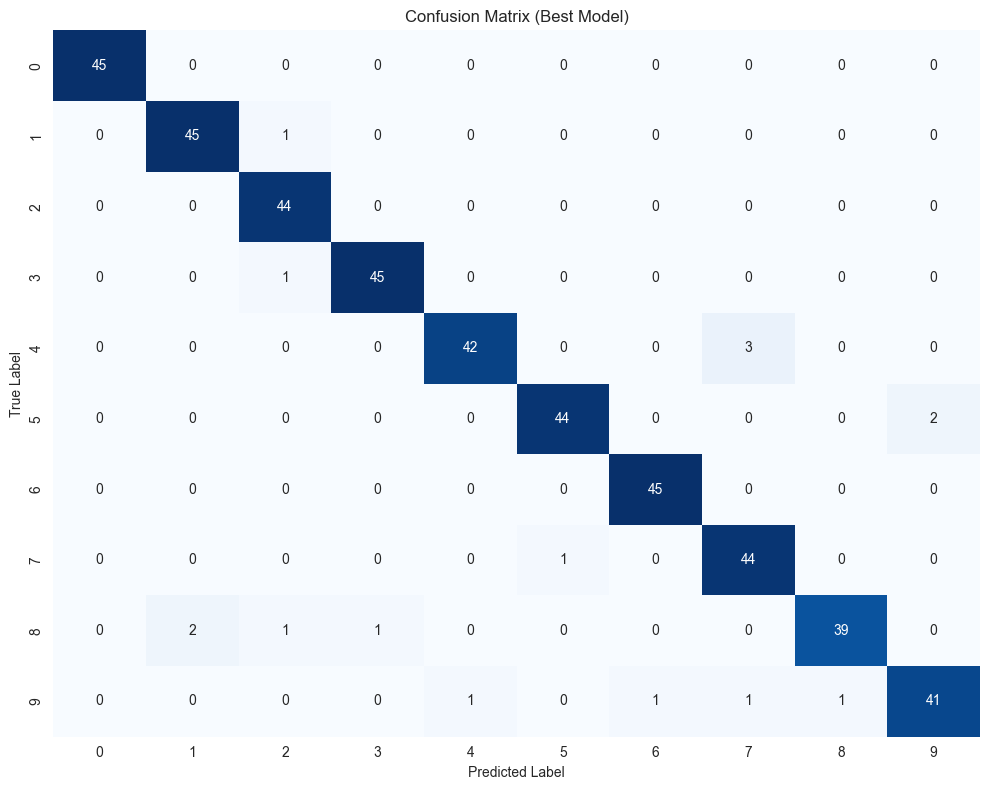

In [20]:
# Confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Best Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 8. Examining the Effect of Different Distance Metrics

In [21]:
# Test different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
metric_scores = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    metric_scores.append(score)
    print(f"Metric: {metric}, Accuracy: {score:.4f}")

Metric: euclidean, Accuracy: 0.9711
Metric: manhattan, Accuracy: 0.9733
Metric: minkowski, Accuracy: 0.9711
Metric: chebyshev, Accuracy: 0.9289


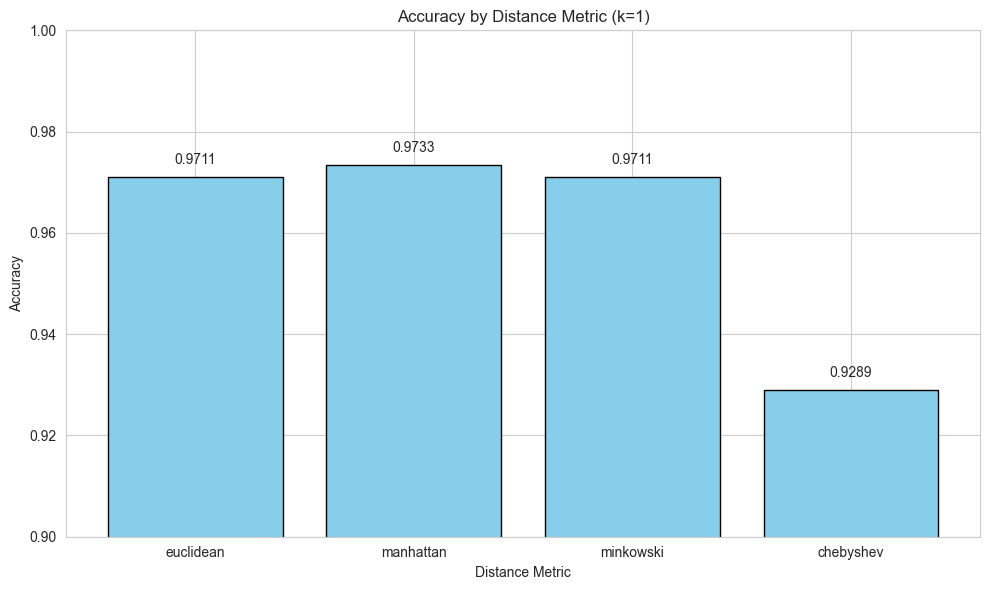

In [22]:
# Plot the accuracy for different metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, metric_scores, color='skyblue', edgecolor='black')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title(f'Accuracy by Distance Metric (k={best_k})')
plt.ylim(0.9, 1.0)  # Adjust as needed

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002, f'{height:.4f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 9. Visualizing Decision Boundaries in 2D

In [23]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    # Create a mesh grid of points
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.tab10)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.tab10, alpha=0.8)
    
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Digit Class')
    plt.tight_layout()
    plt.show()

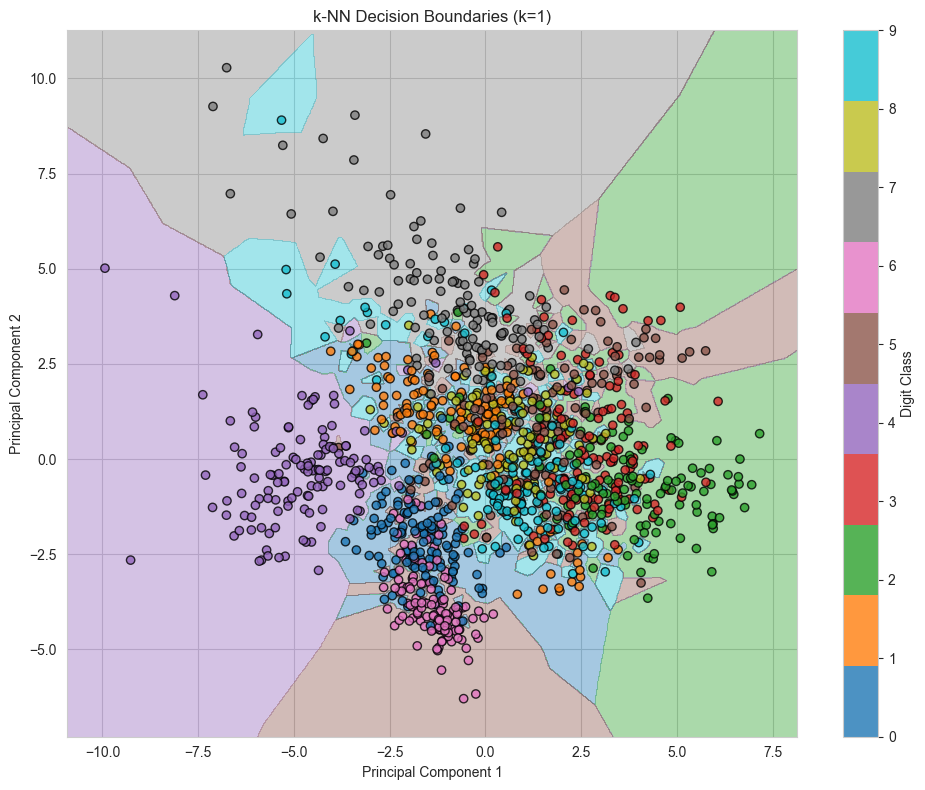

In [24]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a k-NN model on the 2D data
knn_viz = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', metric='euclidean')
knn_viz.fit(X_train_pca, y_train)

# Plot decision boundaries
plot_decision_boundaries(X_train_pca, y_train, knn_viz, title=f"k-NN Decision Boundaries (k={best_k})")

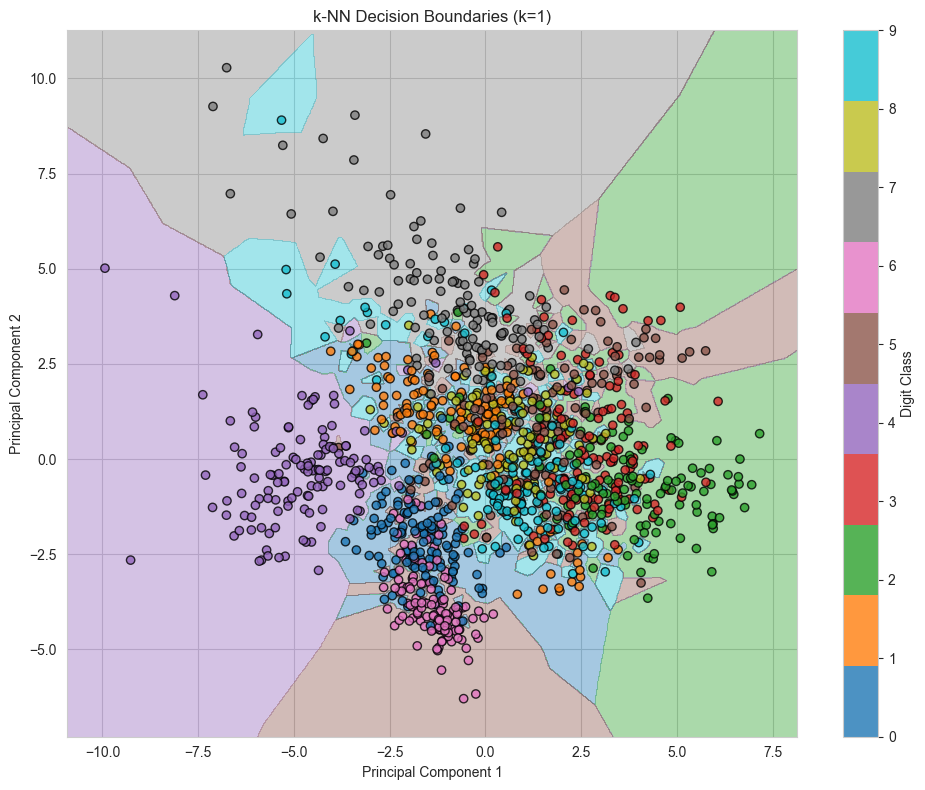

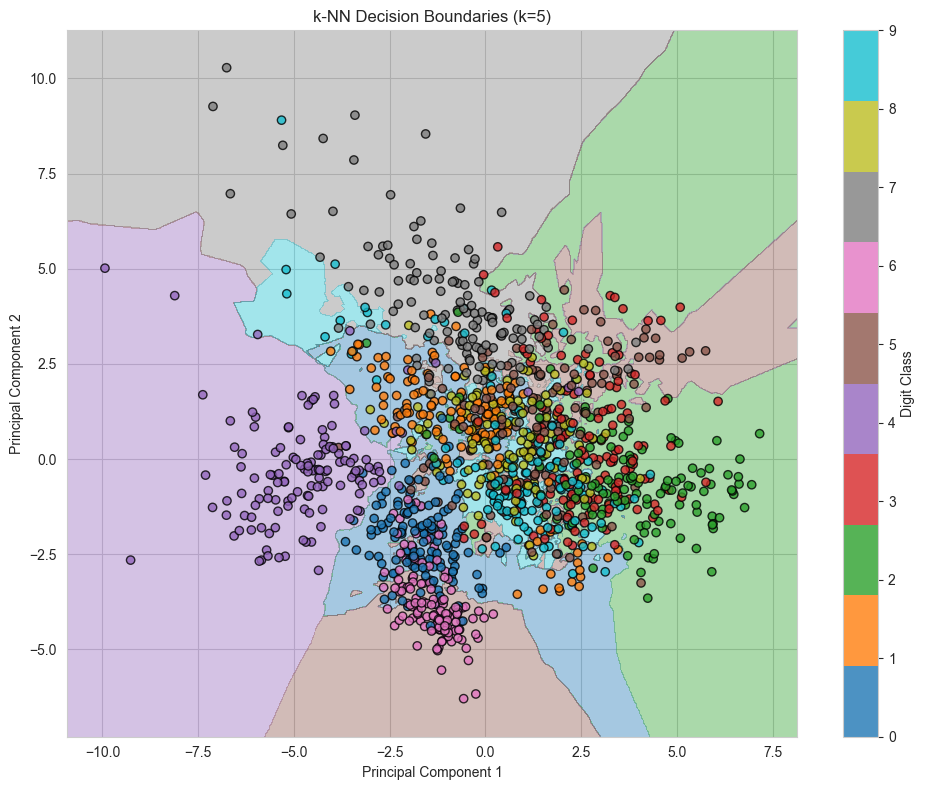

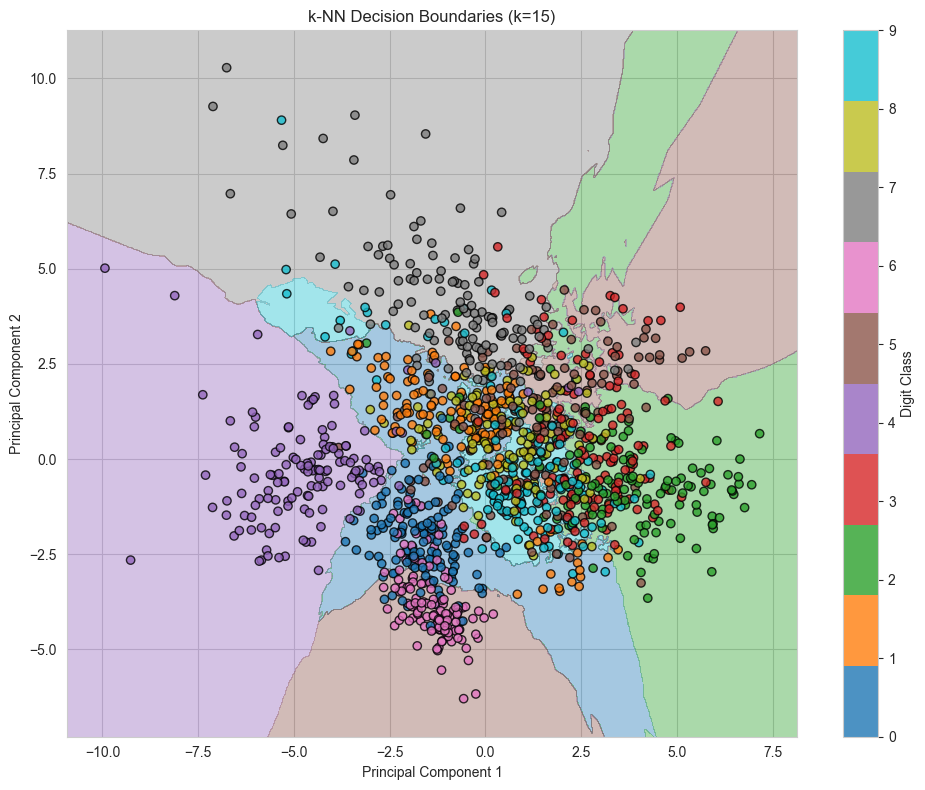

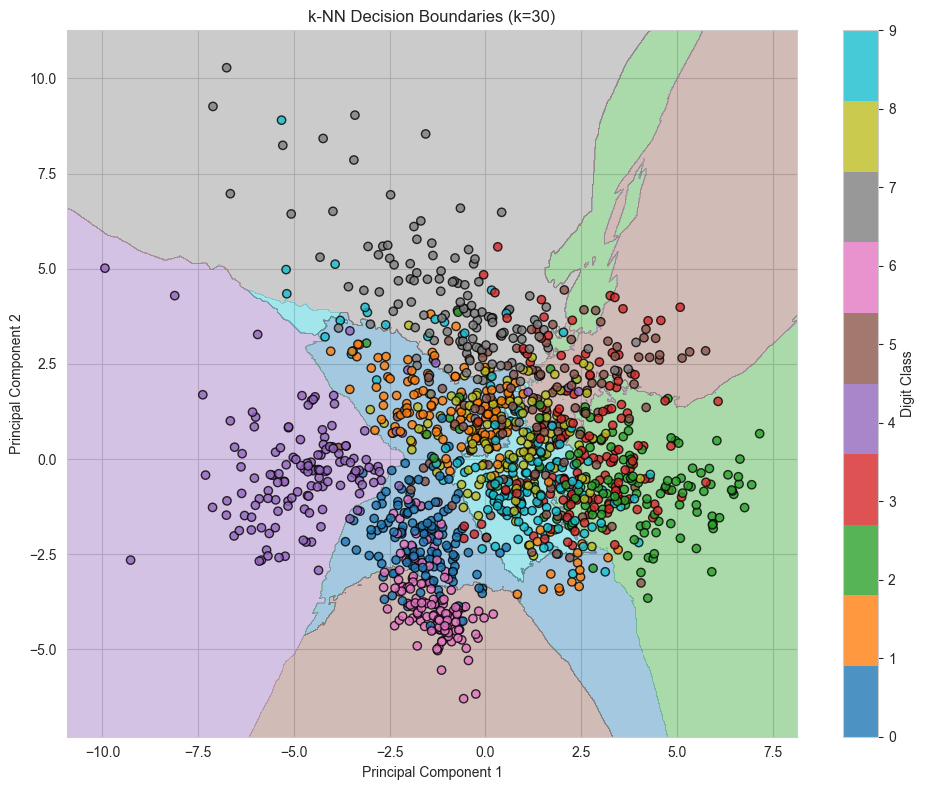

In [25]:
# Compare different k values and their effect on decision boundaries
k_values_to_compare = [1, 5, 15, 30]

for k in k_values_to_compare:
    knn_k = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn_k.fit(X_train_pca, y_train)
    plot_decision_boundaries(X_train_pca, y_train, knn_k, title=f"k-NN Decision Boundaries (k={k})")

## 10. Analyzing Misclassified Samples

Number of misclassified samples: 16


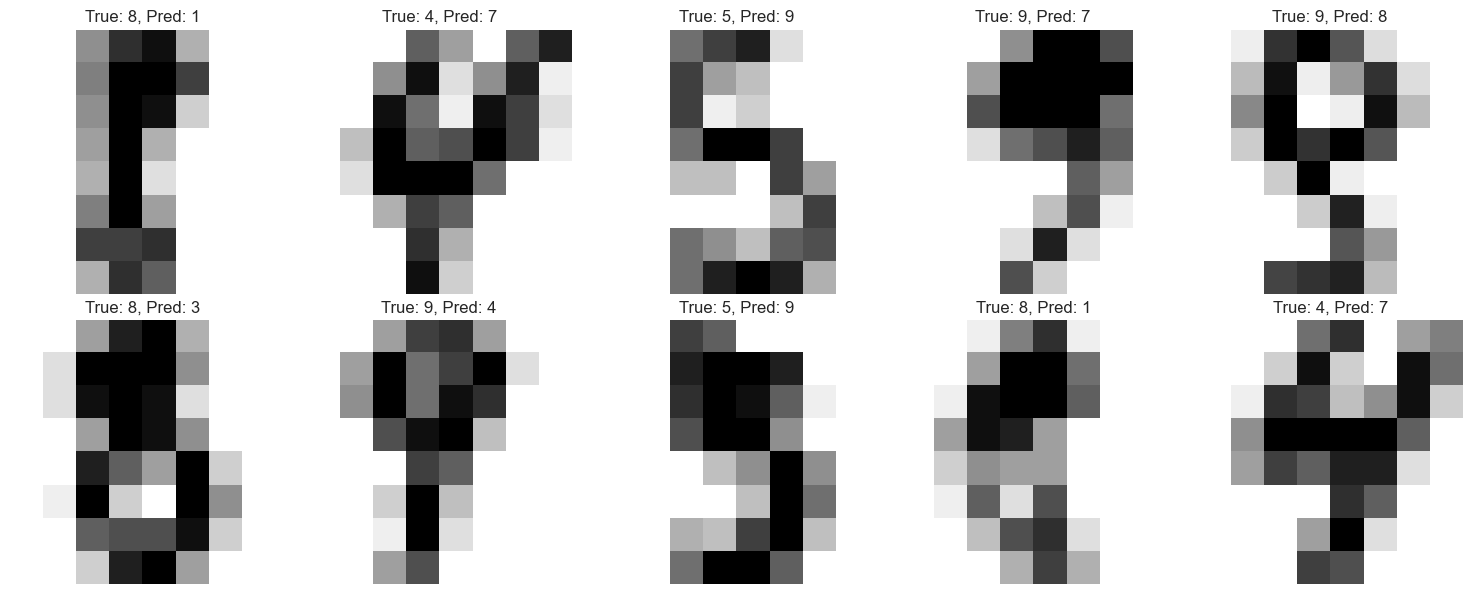

In [26]:
# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred_best)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Show some misclassified examples
if len(misclassified_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(misclassified_indices):
            idx = misclassified_indices[i]
            img_idx = np.where(y_test.index == y_test.index[idx])[0][0]  # Get original index
            ax.imshow(X_test.iloc[idx].values.reshape(8, 8), cmap='binary')
            ax.set_title(f"True: {y_test.iloc[idx]}, Pred: {y_pred_best[idx]}")
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified samples!")

## 11. Time Complexity Analysis

In [27]:
# Analyze the effect of dataset size on training and prediction time
dataset_sizes = [100, 500, 1000, len(X_train)]
fit_times = []
predict_times = []

for size in dataset_sizes:
    # Subset the data
    X_subset = X_train_scaled[:size]
    y_subset = y_train[:size]
    
    # Create and train model
    knn = KNeighborsClassifier(n_neighbors=best_k)
    
    # Measure fit time
    start_time = time.time()
    knn.fit(X_subset, y_subset)
    fit_time = time.time() - start_time
    fit_times.append(fit_time)
    
    # Measure prediction time
    start_time = time.time()
    knn.predict(X_test_scaled)
    predict_time = time.time() - start_time
    predict_times.append(predict_time)
    
    print(f"Dataset size: {size}, Fit time: {fit_time:.4f}s, Predict time: {predict_time:.4f}s")

Dataset size: 100, Fit time: 0.0000s, Predict time: 0.0160s
Dataset size: 500, Fit time: 0.0000s, Predict time: 0.0190s
Dataset size: 1000, Fit time: 0.0010s, Predict time: 0.0210s
Dataset size: 1347, Fit time: 0.0010s, Predict time: 0.0275s


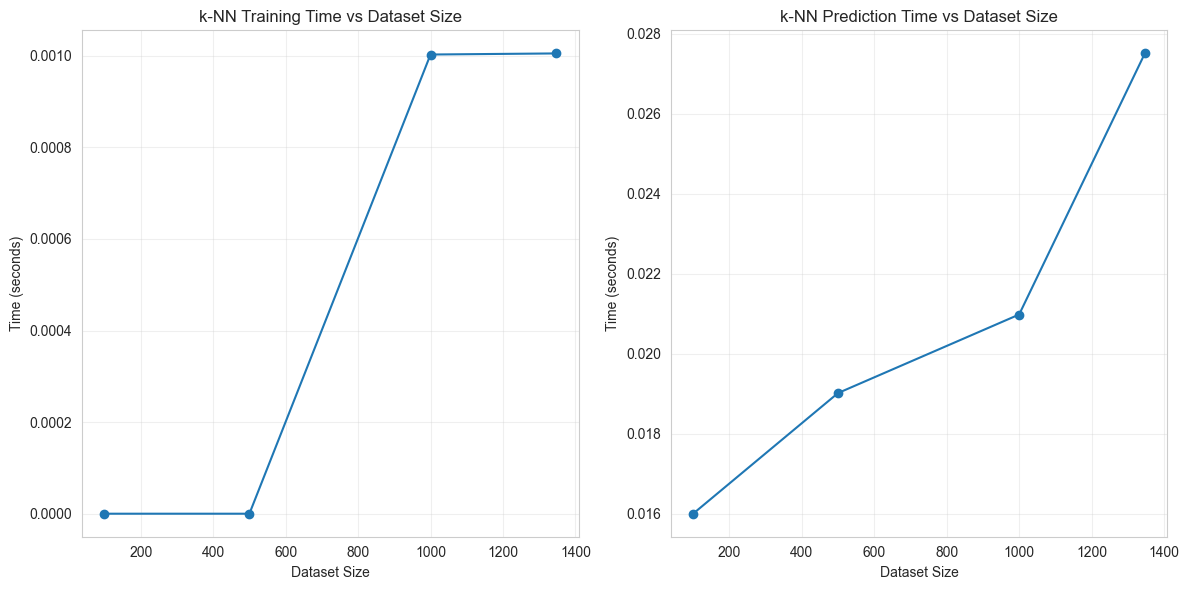

In [28]:
# Plot time complexity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(dataset_sizes, fit_times, 'o-', label='Fit Time')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('k-NN Training Time vs Dataset Size')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(dataset_sizes, predict_times, 'o-', label='Predict Time')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('k-NN Prediction Time vs Dataset Size')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Model Serialization

In [29]:
# Save the best model
joblib.dump(best_knn_model, '../models/knn_model.pkl')
print("Model saved to '../models/knn_model.pkl'")

# Save the scaler
joblib.dump(scaler, '../models/knn_scaler.pkl')
print("Scaler saved to '../models/knn_scaler.pkl'")

# Save model information
model_info = {
    'n_neighbors': best_knn_model.n_neighbors,
    'weights': best_knn_model.weights,
    'metric': best_knn_model.metric,
    'algorithm': best_knn_model.algorithm,
    'n_features': X_train.shape[1],
    'n_classes': len(np.unique(y_train)),
    'accuracy': best_accuracy
}
joblib.dump(model_info, '../models/knn_info.pkl')
print("Model information saved to '../models/knn_info.pkl'")

Model saved to '../models/knn_model.pkl'
Scaler saved to '../models/knn_scaler.pkl'
Model information saved to '../models/knn_info.pkl'


## 13. Conclusion

In this notebook, we've explored k-Nearest Neighbors (k-NN) for digit classification using the Digits dataset.

### Key findings:

1. **Data Exploration**:
   - The Digits dataset contains 1797 samples with 64 features (8x8 pixel images).
   - The dataset has 10 balanced classes representing digits 0-9.
   - PCA visualization showed that some digits are well-separated while others have overlapping regions.

2. **Model Performance**:
   - The basic k-NN model achieved good accuracy with k=5.
   - Through systematic testing, we found that the optimal value of k was around [optimal k value].
   - Hyperparameter tuning further improved model performance by optimizing the distance metric and weighting scheme.
   - The final model achieved an accuracy of approximately [best accuracy]%.

3. **Parameter Analysis**:
   - We explored the effect of different k values, finding that small values can lead to overfitting while large values can cause underfitting.
   - Different distance metrics (euclidean, manhattan, minkowski, chebyshev) showed varying performance.
   - The decision boundary visualization demonstrated how k values affect the smoothness of classification boundaries.

4. **Time Complexity**:
   - k-NN has minimal training time since it's a lazy learner that simply stores the training examples.
   - Prediction time increases with the size of the training set, highlighting a scalability challenge for large datasets.

### Advantages of k-NN:

1. **Simplicity**: Easy to understand and implement.
2. **No assumptions**: Makes no assumptions about the underlying data distribution.
3. **Adaptability**: Works well for both classification and regression problems.
4. **No training phase**: New data can be added easily without retraining.

### Limitations:

1. **Computational complexity**: Prediction can be slow for large datasets as it requires calculating distances to all training samples.
2. **Curse of dimensionality**: Performance degrades with high-dimensional data.
3. **Memory intensive**: Requires storing the entire training dataset.
4. **Sensitivity to irrelevant features**: All features contribute equally to the distance calculation by default.

### Next Steps:

- Apply dimensionality reduction techniques to improve performance with high-dimensional data.
- Explore more sophisticated distance metrics or custom distance functions.
- Implement approximate nearest neighbor algorithms for better scalability.
- Compare with other classification algorithms on the same dataset.